In [4]:
# Set-up
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df1 = pd.read_csv('MY_USAGE_Mental Health Crisis Lines and Support Services - Toronto.csv')
df2 = pd.read_csv('MY_USAGE_neighbourhood-profiles-2016-csv.csv')

In [5]:
# Make a data frame of the number of services for each neighborhood
allNames = []
names = []
numServices = []
for i in df1["NEIGHBOURHOOD"]:
    allNames.append(i)
    if i not in names:
        names.append(i)   
for i in names:
    numServices.append(allNames.count(i))
df3 = pd.DataFrame({"Neighbourhood" : names, "# Services" : numServices})

In [10]:
 # Getting population for each neighbourhood
populations = []
ratios = []
for i in df3["Neighbourhood"]:
    populations.append(int(df2[i[:i.find(",")]][2].replace(",", "")))

# Getting ratio for each neighbourhood
for i in range(len(names)):
     ratios.append(round(populations[i] / numServices[i]))

# Using everything to create a new data frame and saving
df4 = pd.DataFrame({"Neighbourhood" : names, "# Services" : numServices, "Pop." : populations, "Ppl to 1 clinic" : ratios})

df4.to_csv('nonZeroTorontoRatios.csv')
pd.read_csv("nonZeroTorontoRatios.csv")

,Unnamed: 0,Neighbourhood,# Services,Pop.,Ppl to 1 clinic
0,0,"Church-Yonge Corridor, 75",12,31340,2612
1,1,"Danforth, 66",1,9666,9666
2,2,"East End-Danforth, 62",1,21381,21381
3,3,"Henry Farm, 53",3,15723,5241
4,4,"Woburn, 137",5,53485,10697
5,5,"Etobicoke West Mall, 13",1,11848,11848
6,6,"Elms-Old Rexdale, 5",1,9456,9456
7,7,"Moss Park, 73",6,20506,3418
8,8,"Yorkdale-Glen Park, 31",1,14804,14804
9,9,"Downsview-Roding-CFB, 26",2,35052,17526


In [11]:
# Getting average ratios
# way 1 -total population / total services -I WILL USE THIS ONE
totalP = 0
totalS = 0
for i in range(len(names)):
    totalP += populations[i]
    totalS += numServices[i]
print(round(totalP/totalS))

# way 2 -mean of all ratios
totalR = 0
for i in ratios:
    totalR += i

11858


<AxesSubplot:xlabel='Neighbourhood'>

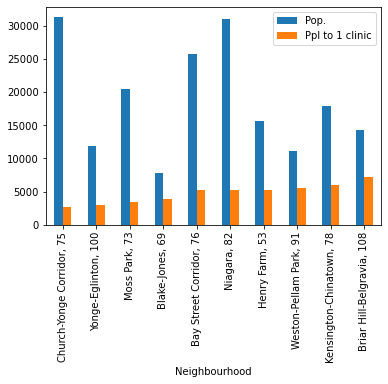

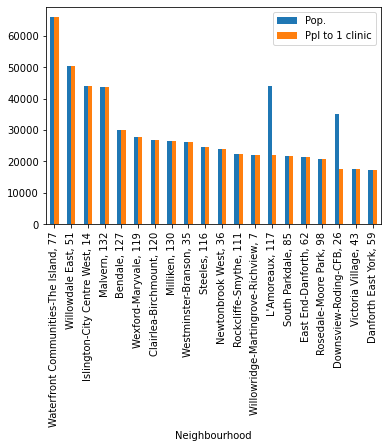

In [12]:
# Top 10 Lowest/Best ratios
df4.sort_values(by="Ppl to 1 clinic").head(10).plot(kind = "bar", x = "Neighbourhood", y = ["Pop.", "Ppl to 1 clinic"])

# Top 20 Highest/Worst # The population = The ratio when there is only one service in the neighbourhood
df4.sort_values(by="Ppl to 1 clinic", ascending = False).head(20).plot(kind = "bar", x = "Neighbourhood", y = ["Pop.", "Ppl to 1 clinic"])